In [1]:
import pandas as pd
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
bb = yf.Ticker("BB")

In [4]:
df_bb_hist = bb.history(period="max")

In [6]:
df_bb_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-02-04 00:00:00-05:00,2.145833,2.166667,1.895833,1.924479,16788600,0.0,0.0
1999-02-05 00:00:00-05:00,1.929688,1.947917,1.822917,1.833333,3053400,0.0,0.0
1999-02-08 00:00:00-05:00,1.854167,1.927083,1.783854,1.812500,1548000,0.0,0.0
1999-02-09 00:00:00-05:00,1.822917,1.833333,1.656250,1.666667,3501600,0.0,0.0
1999-02-10 00:00:00-05:00,1.708333,1.708333,1.604167,1.677083,1597200,0.0,0.0


<Axes: xlabel='Date'>

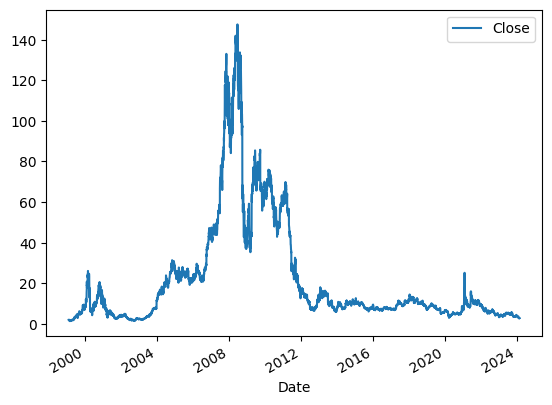

In [7]:
df_bb_hist.plot.line(y="Close", use_index=True)

In [13]:
df_close = df_bb_hist[["Close"]]
df_close = df_close.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
df_close["Target"] = df_close.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Actual_Close"]

In [14]:
df_close.head()

,Actual_Close,Target
Date,,
1999-02-04 00:00:00-05:00,1.924479,NaN
1999-02-05 00:00:00-05:00,1.833333,0.0
1999-02-08 00:00:00-05:00,1.812500,0.0
1999-02-09 00:00:00-05:00,1.666667,0.0
1999-02-10 00:00:00-05:00,1.677083,1.0


In [16]:
data = df_close.join(df_bb_hist.shift(1))

In [19]:
print(df_bb_hist.shape)
print(df_close.shape)
print(data.shape)

(6300, 7)
(6300, 2)
(6300, 9)


In [21]:
data = data.iloc[1:]

In [22]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [34]:
train = data.iloc[:-100]
test = data.iloc[-100:]

In [ ]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

In [35]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)
precision_score(test["Target"], predictions)

0.4367816091954023

In [36]:
combined = pd.concat({"Target": test["Target"],"Predictions": predictions}, axis=1)

<Axes: xlabel='Date'>

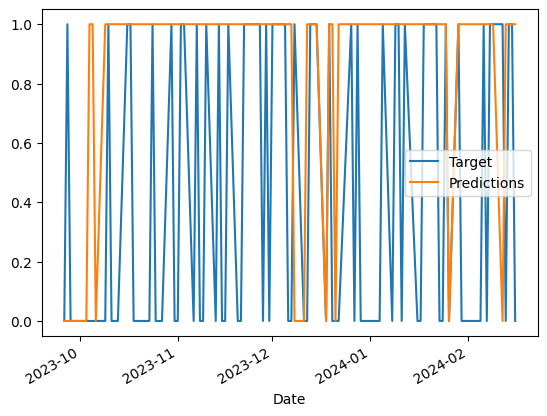

In [37]:
combined.plot()